In [26]:
import os
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization, Resizing
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [41]:
## Hyperparameters

HEIGHT = 150
WIDTH = 150
CHANNELS = 3

EPOCHS = 10
BATCH_SIZE = 16
LR = 0.001

In [29]:
## Data
(train_images,train_labels) = tfds.as_numpy(tfds.load('rock_paper_scissors', split='train', batch_size=-1, as_supervised = True))
(test_images,test_labels) = tfds.as_numpy(tfds.load('rock_paper_scissors', split='test', batch_size=-1, as_supervised = True))

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255, vertical_flip=True, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, vertical_flip=True, horizontal_flip=True)

In [31]:
train_data = train_datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE, shuffle=True)
test_data = test_datagen.flow(test_images, test_labels, batch_size=BATCH_SIZE, shuffle=True)

In [72]:
model = Sequential([
    Resizing(HEIGHT, WIDTH),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [73]:
model.compile(optimizer=RMSprop(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)

Epoch 1/10
79/79 [==============================] - 21s 250ms/step - loss: 1.1602 - accuracy: 0.3393 - val_loss: 1.0979 - val_accuracy: 0.3495
Epoch 2/10
79/79 [==============================] - 19s 239ms/step - loss: 1.0874 - accuracy: 0.4389 - val_loss: 0.9771 - val_accuracy: 0.6156
Epoch 3/10
79/79 [==============================] - 19s 239ms/step - loss: 0.5673 - accuracy: 0.7770 - val_loss: 0.3896 - val_accuracy: 0.8763
Epoch 4/10
79/79 [==============================] - 20s 251ms/step - loss: 0.2165 - accuracy: 0.9210 - val_loss: 0.2682 - val_accuracy: 0.8844
Epoch 5/10
79/79 [==============================] - 19s 238ms/step - loss: 0.2197 - accuracy: 0.9524 - val_loss: 1.0687 - val_accuracy: 0.8065
Epoch 6/10
79/79 [==============================] - 19s 238ms/step - loss: 0.1486 - accuracy: 0.9659 - val_loss: 0.4592 - val_accuracy: 0.9059
Epoch 7/10
79/79 [==============================] - 19s 238ms/step - loss: 0.0917 - accuracy: 0.9802 - val_loss: 0.5393 - val_accuracy: 0.9032

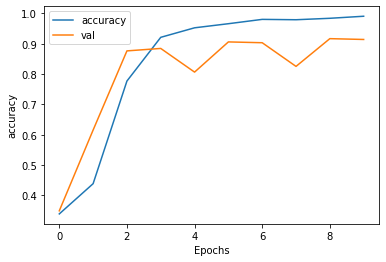

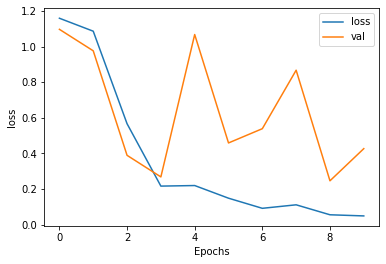

In [75]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.plot(history.history['val_'+string], label= "val")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save_weights('cnn_weights.h5')
model.save('cnn.h5')